# Basic Image Retrieval


## 1. Load data

In [ ]:
!gdown 1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF

Downloading...
From (original): https://drive.google.com/uc?id=1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF
From (redirected): https://drive.google.com/uc?id=1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF&confirm=t&uuid=17b2f7f4-eb92-45b1-8e1c-8b16a6ead9b5
To: /content/data.zip
100% 76.1M/76.1M [00:00<00:00, 84.2MB/s]


In [ ]:
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/.ipynb_checkpoints/
   creating: data/test/
   creating: data/test/American_egret/
  inflating: data/test/American_egret/n02009912_2473.JPEG  
   creating: data/test/Doberman/
  inflating: data/test/Doberman/n02107142_52285.JPEG  
   creating: data/test/Rhodesian_ridgeback/
  inflating: data/test/Rhodesian_ridgeback/n02087394_18723.JPEG  
   creating: data/test/African_crocodile/
  inflating: data/test/African_crocodile/n01697457_18534.JPEG  
   creating: data/test/Lakeland_terrier/
  inflating: data/test/Lakeland_terrier/n02095570_4644.JPEG  
   creating: data/test/ambulance/
  inflating: data/test/ambulance/n02701002_2311.JPEG  
   creating: data/test/apiary/
  inflating: data/test/apiary/n02727426_4398.JPEG  
   creating: data/test/bannister/
  inflating: data/test/bannister/n02788148_47071.JPEG  
   creating: data/test/basketball/
  inflating: data/test/basketball/n02802426_12693.JPEG  
   creating: data/test/barn_spider/
  in

## 2. Import libraries

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## 3. Read data

In [ ]:
ROOT = "data"
CLASS_NAME = sorted(list(os.listdir(f"{ROOT}/train")))

In [ ]:
def read_image_from_path(path, size):
    im = Image.open(path).convert("RGB").resize(size)
    return np.array(im)

def folder_to_images(folder, size):
    list_dir = [folder + "/" + name for name in os.listdir(folder)]
    images_np = np.zeros(shape=(len(list_dir), *size, 3))
    images_path = []
    for i, path in enumerate(list_dir):
        images_np[i] = read_image_from_path(path, size)
        images_path.append(path)
    images_path = np.array(images_path)
    return images_np, images_path

## 4. Measure functions

In [ ]:
def absolute_difference(query, data, axis):
    return np.sum(np.abs(data - query), axis = axis)

def mean_square_difference(query, data, axis):
    return np.mean((data - query)**2, axis=axis)

def cosine_similarity(query, data, axis):
    query_norm = np.sqrt(np.sum(query**2))
    data_norm = np.sqrt(np.sum(data**2, axis=axis))
    return np.sum(data * query, axis=axis) / (query_norm*data_norm + np.finfo(float).eps)

def correlation_coefficient(query, data, axis):
    query_mean = query - np.mean(query)
    data_mean = data - np.mean(data, axis=axis, keepdims=True)
    query_norm = np.sqrt(np.sum(query_mean**2))
    data_norm = np.sqrt(np.sum(data_mean**2, axis=axis))
    return np.sum(data_mean * query_mean, axis=axis) / (query_norm*data_norm + np.finfo(float).eps)

def measure_function(query, data, measure_type):
    axis_batch_size = tuple(range(1, len(data.shape)))
    result = None
    if measure_type == "l1":
        result = absolute_difference(query, data, axis_batch_size)
    elif measure_type == "l2":
        result = mean_square_difference(query, data, axis_batch_size)
    elif measure_type == "cosine":
        result = cosine_similarity(query, data, axis_batch_size)
    elif measure_type == "coeff":
        result = correlation_coefficient(query, data, axis_batch_size)
    return result

## 5. Get image scores

In [ ]:
def get_image_score(root_img_path, query_path, size, measure_type, reverse):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size)
            rates = measure_function(query, images_np, measure_type)
            ls_path_score.extend(list(zip(images_path, rates)))
    ls_path_score = sorted(ls_path_score, key=lambda x : x[1], reverse=reverse)[:5]
    return query, ls_path_score

## 6. Show results

In [ ]:
def plot_results(querquery_pathy, ls_path_score):
    fig = plt.figure(figsize=(12, 5))
    fig.add_subplot(2, 3, 1)
    plt.imshow(read_image_from_path(querquery_pathy, size=(448,448)))
    plt.title(f"Query Image: {querquery_pathy.split('/')[2]}", fontsize=16)
    plt.axis("off")
    for i, path in enumerate(ls_path_score, 2):
        fig.add_subplot(2, 3, i)
        plt.imshow(read_image_from_path(path[0], size=(448,448)))
        plt.title(f"Top {i-1}: {path[0].split('/')[2]}", fontsize=16)
        plt.axis("off")
    plt.show()

### Simple image

In [ ]:
root_img_path = f"{ROOT}/train/"
size = (448, 448)
query_path_1 = f"{ROOT}/test/Orange_easy/0_100.jpg"

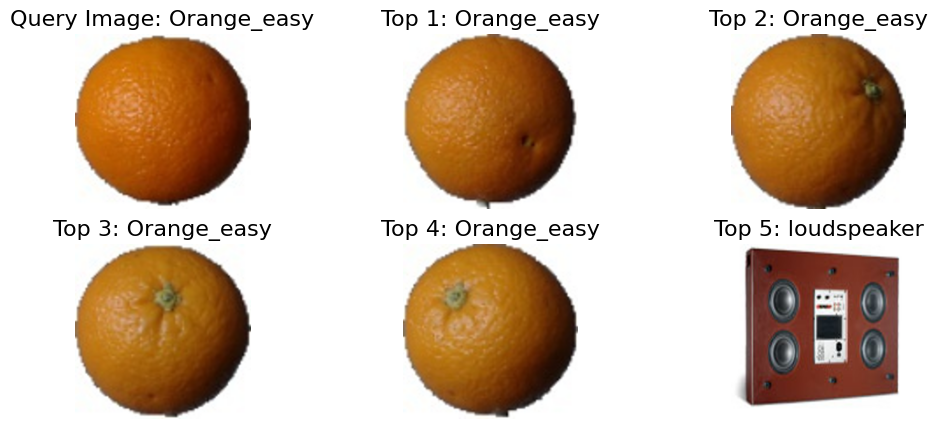

In [ ]:
# L1
query, ls_path_score = get_image_score(root_img_path, query_path_1, size, "l1", reverse=False)
plot_results(query_path_1, ls_path_score)

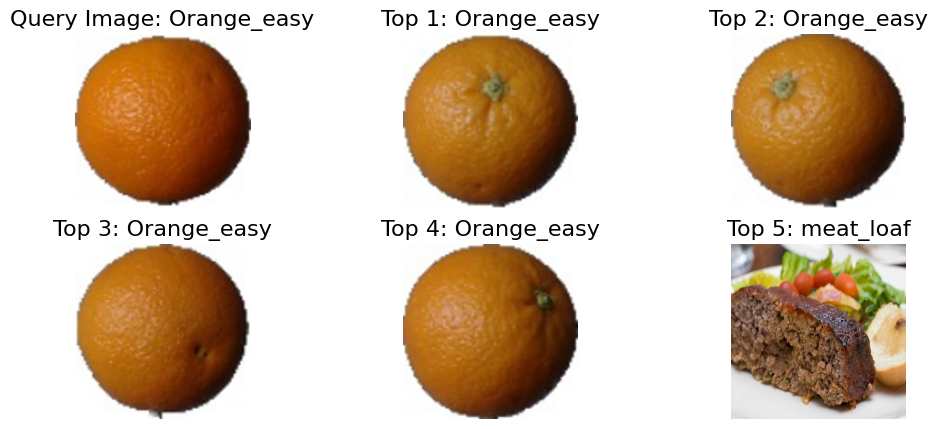

In [ ]:
# L2
query, ls_path_score = get_image_score(root_img_path, query_path_1, size, "l2", reverse=False)
plot_results(query_path_1, ls_path_score)

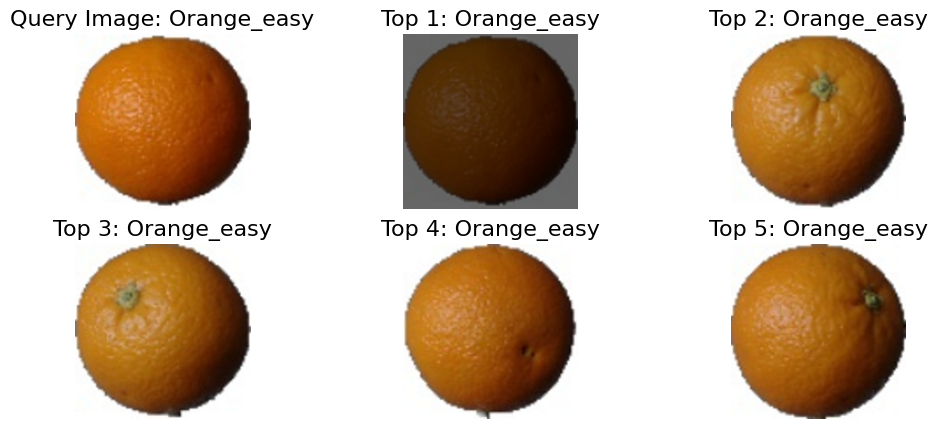

In [ ]:
# Cosine similarity
query, ls_path_score = get_image_score(root_img_path, query_path_1, size, "cosine", reverse=True)
plot_results(query_path_1, ls_path_score)

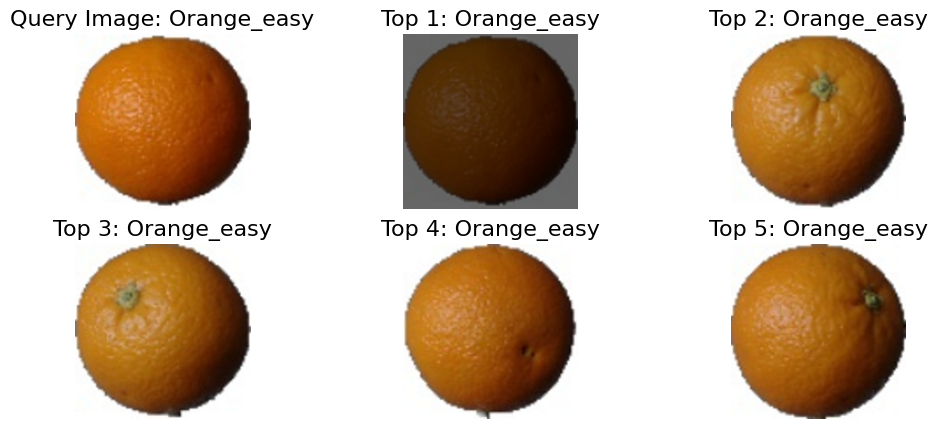

In [ ]:
# Correlation coefficient
query, ls_path_score = get_image_score(root_img_path, query_path_1, size, "coeff", reverse=True)
plot_results(query_path_1, ls_path_score)

### Hard image

In [ ]:
query_path_2 = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"

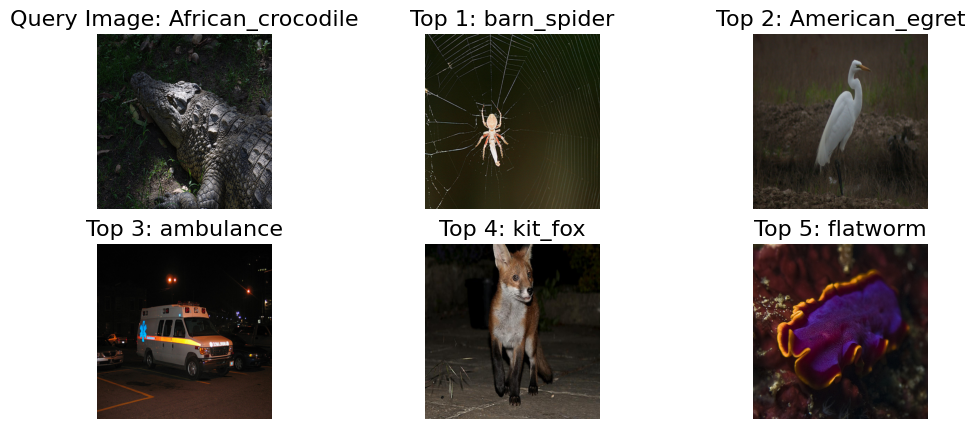

In [ ]:
# L1
query, ls_path_score = get_image_score(root_img_path, query_path_2, size, "l1", reverse=False)
plot_results(query_path_2, ls_path_score)

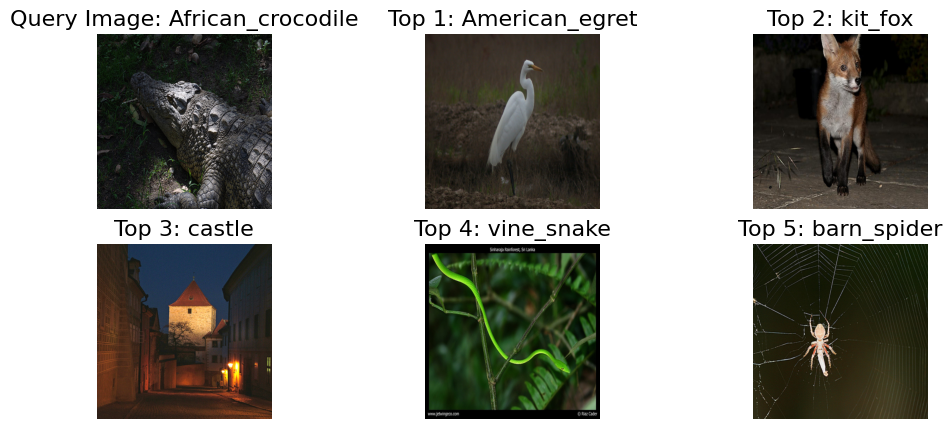

In [ ]:
# L2
query, ls_path_score = get_image_score(root_img_path, query_path_2, size, "l2", reverse=False)
plot_results(query_path_2, ls_path_score)

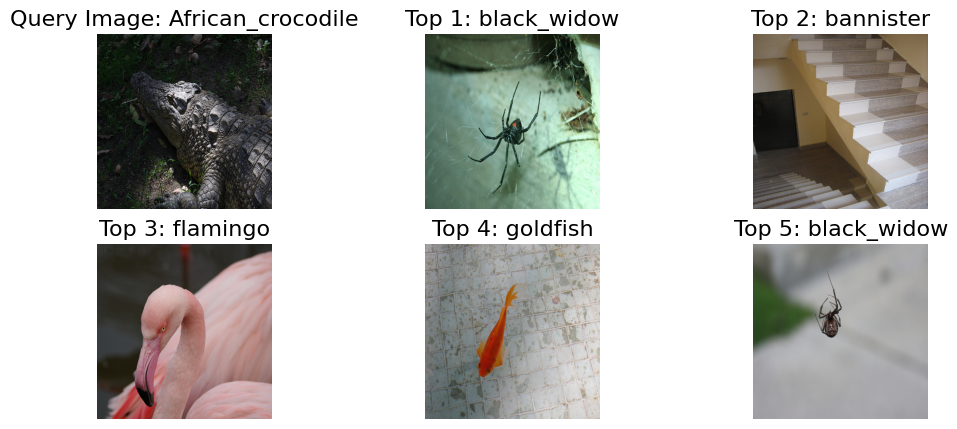

In [ ]:
# Cosine similarity
query, ls_path_score = get_image_score(root_img_path, query_path_2, size, "cosine", reverse=True)
plot_results(query_path_2, ls_path_score)

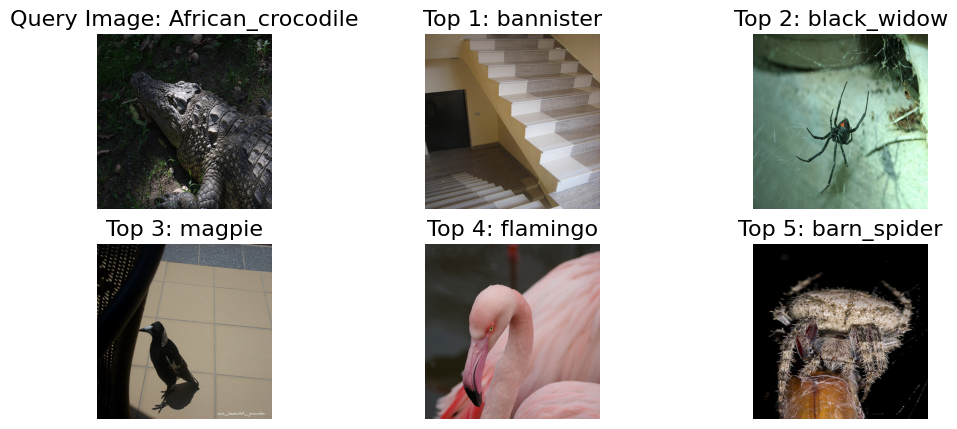

In [ ]:
# Correlation coefficient
query, ls_path_score = get_image_score(root_img_path, query_path_2, size, "coeff", reverse=True)
plot_results(query_path_2, ls_path_score)